# Visualising 2D data

For this example, we'll use the Meteor Impact data from NASA, available here:
https://www.kaggle.com/nasa/meteorite-landings

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_csv("meteorite-landings.csv")
df.head()

name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)

In [11]:
df = df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]

## 2D Histograms

The staple

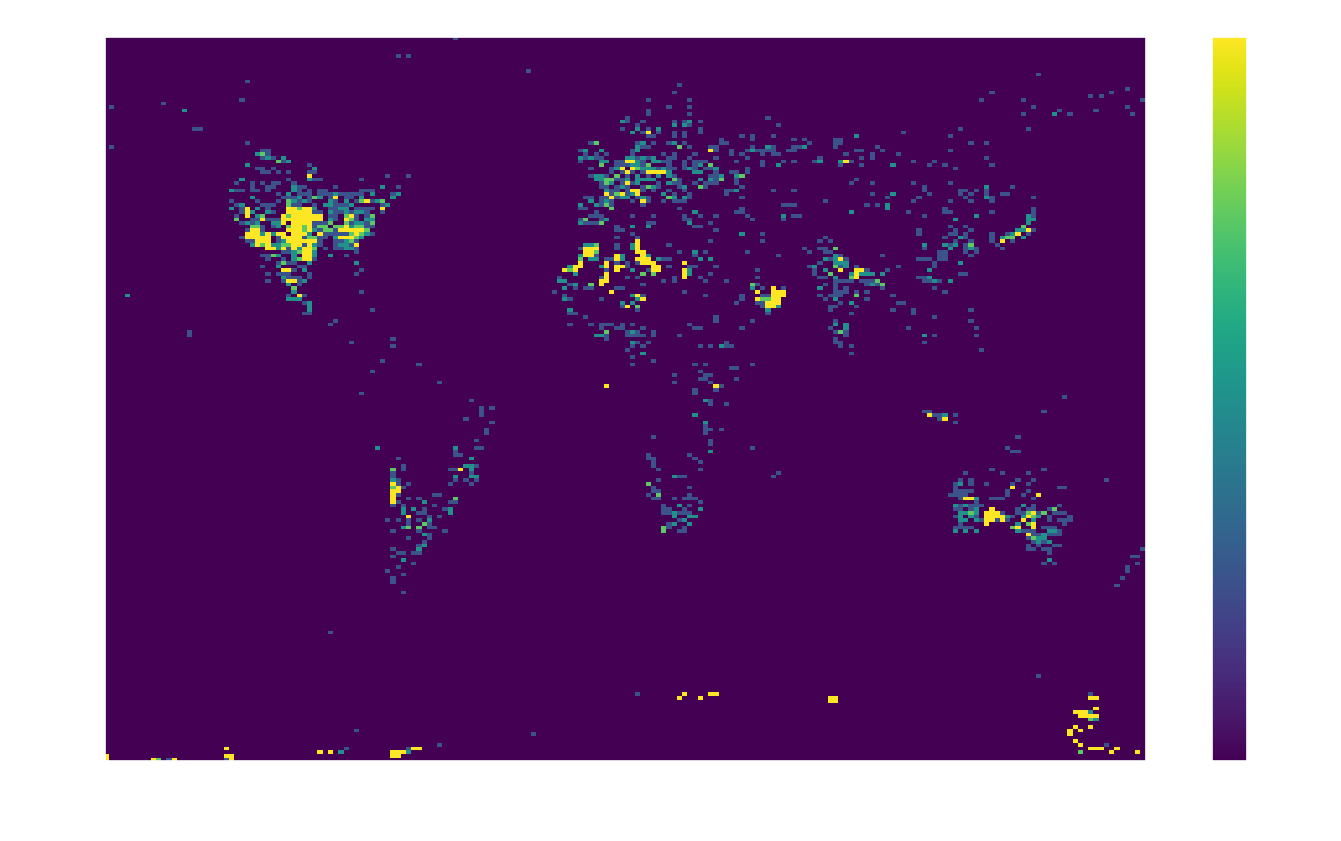

In [14]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar();

## 2D Hex plots

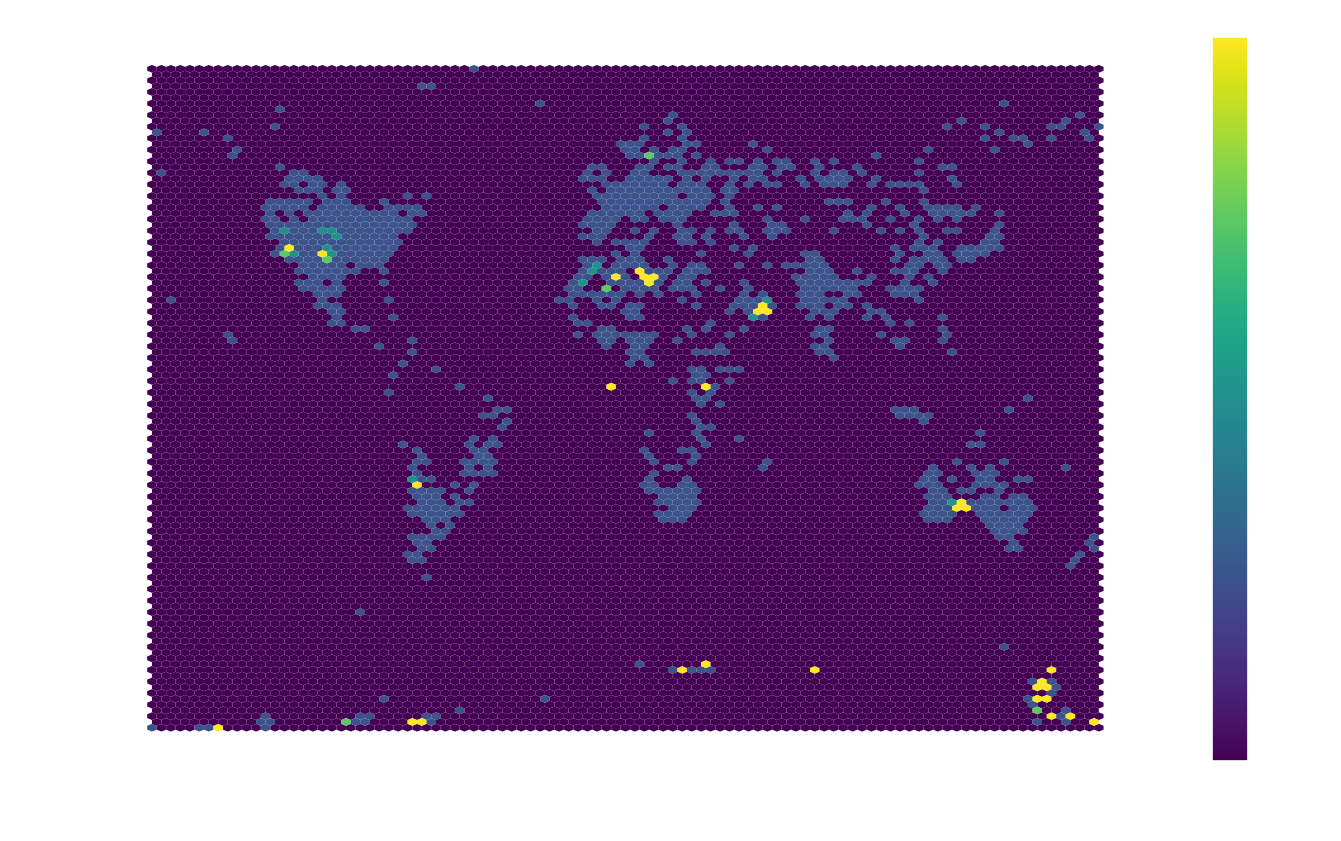

In [17]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

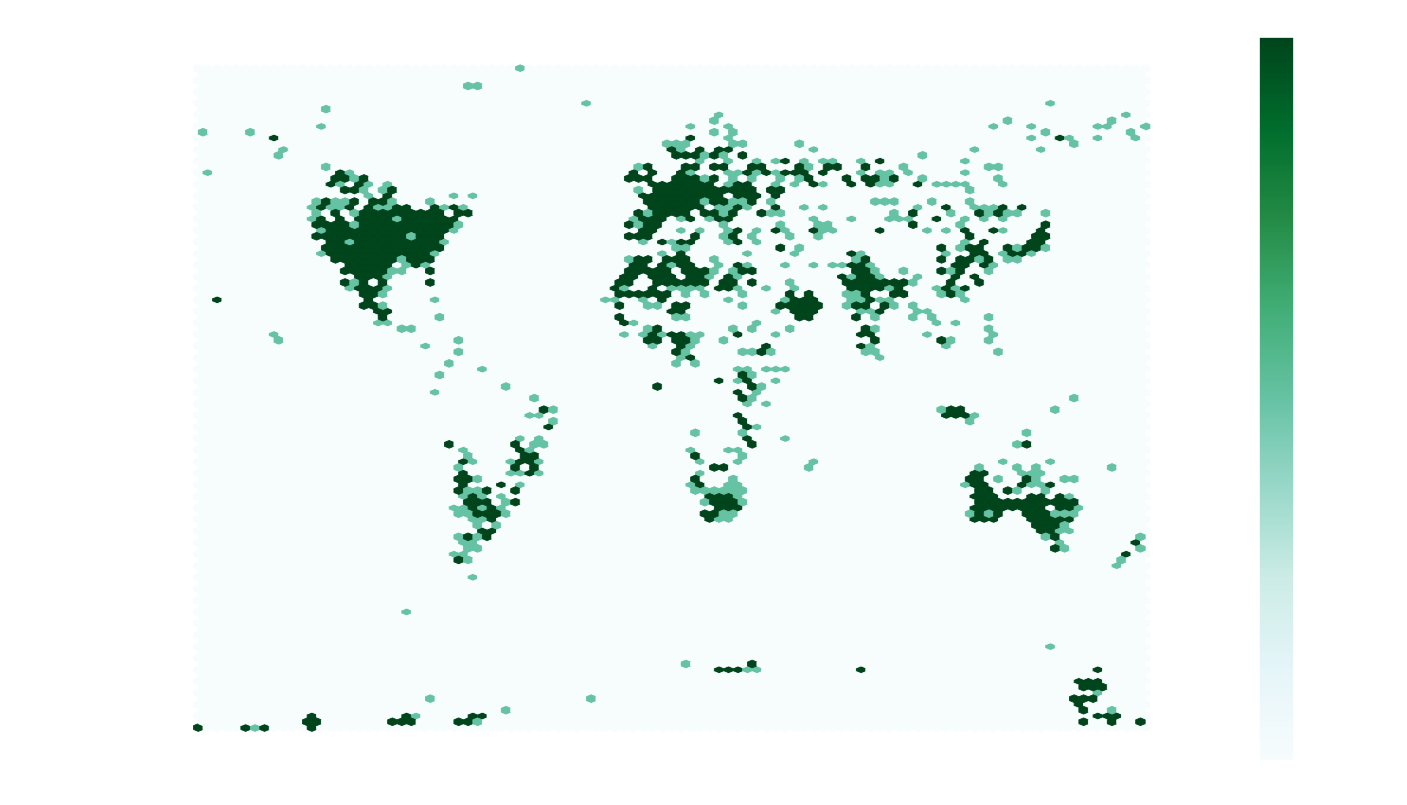

In [18]:
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=0.25);

## Contour

It's easiest to show these plots using data with broader shapes, so let's make some.

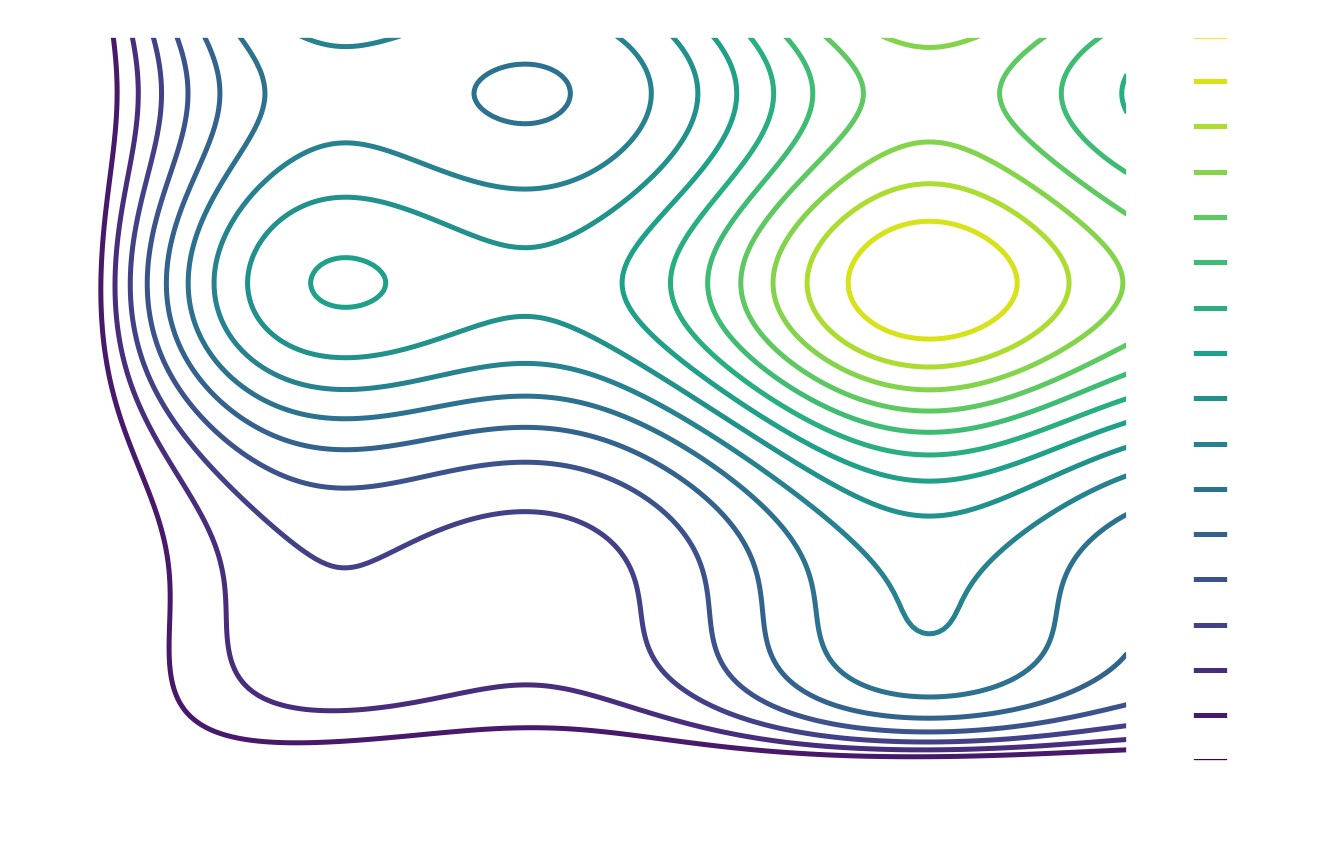

In [19]:
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

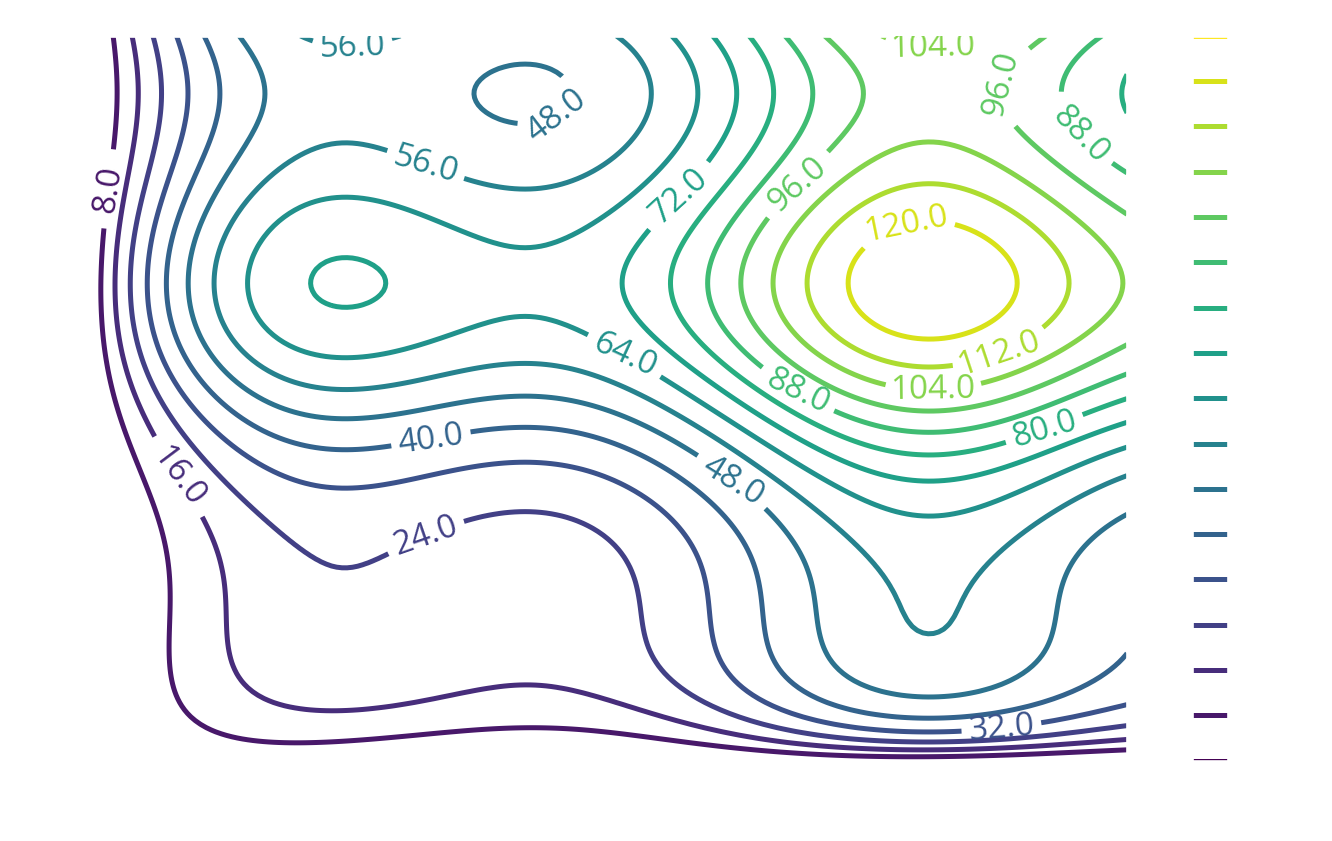

In [20]:
c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

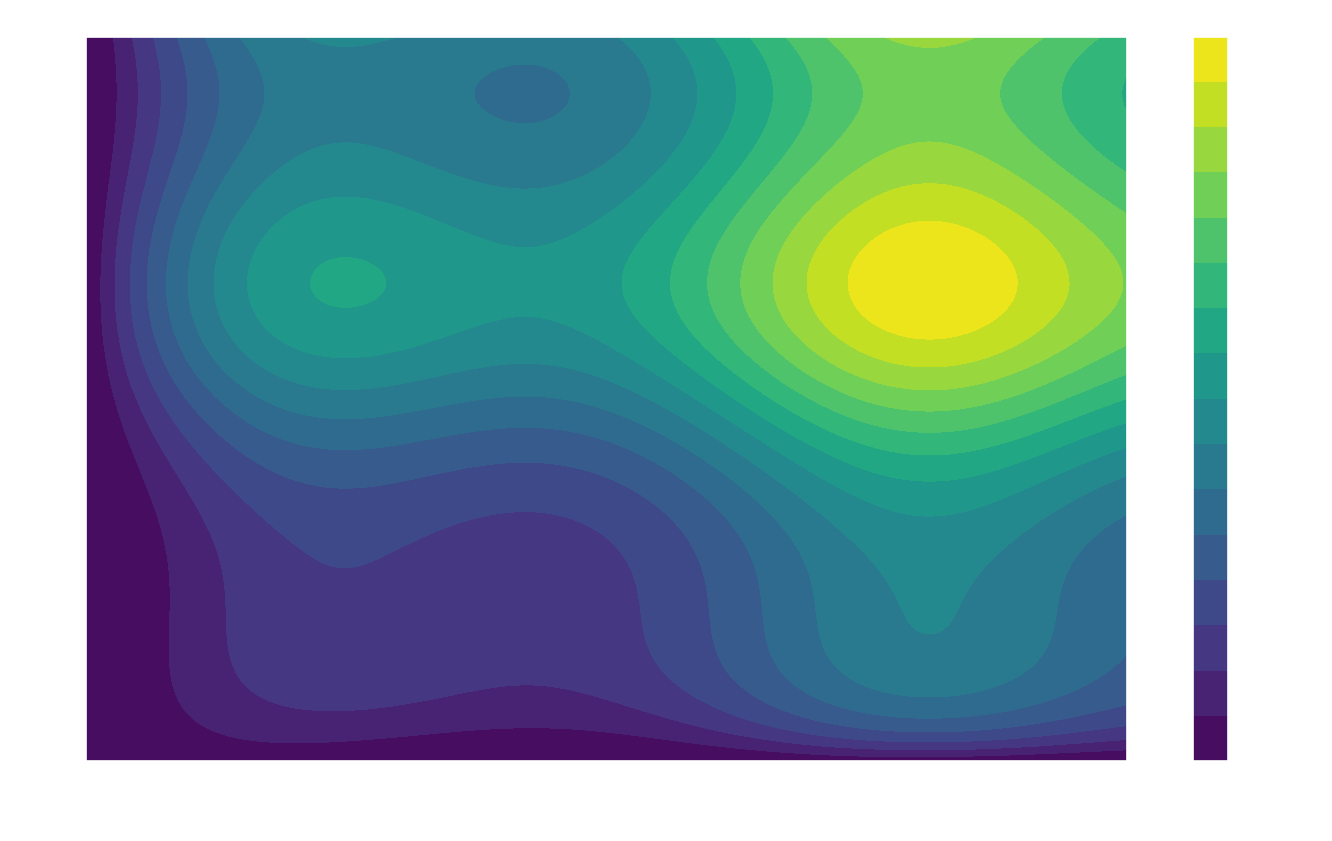

In [21]:
c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar();

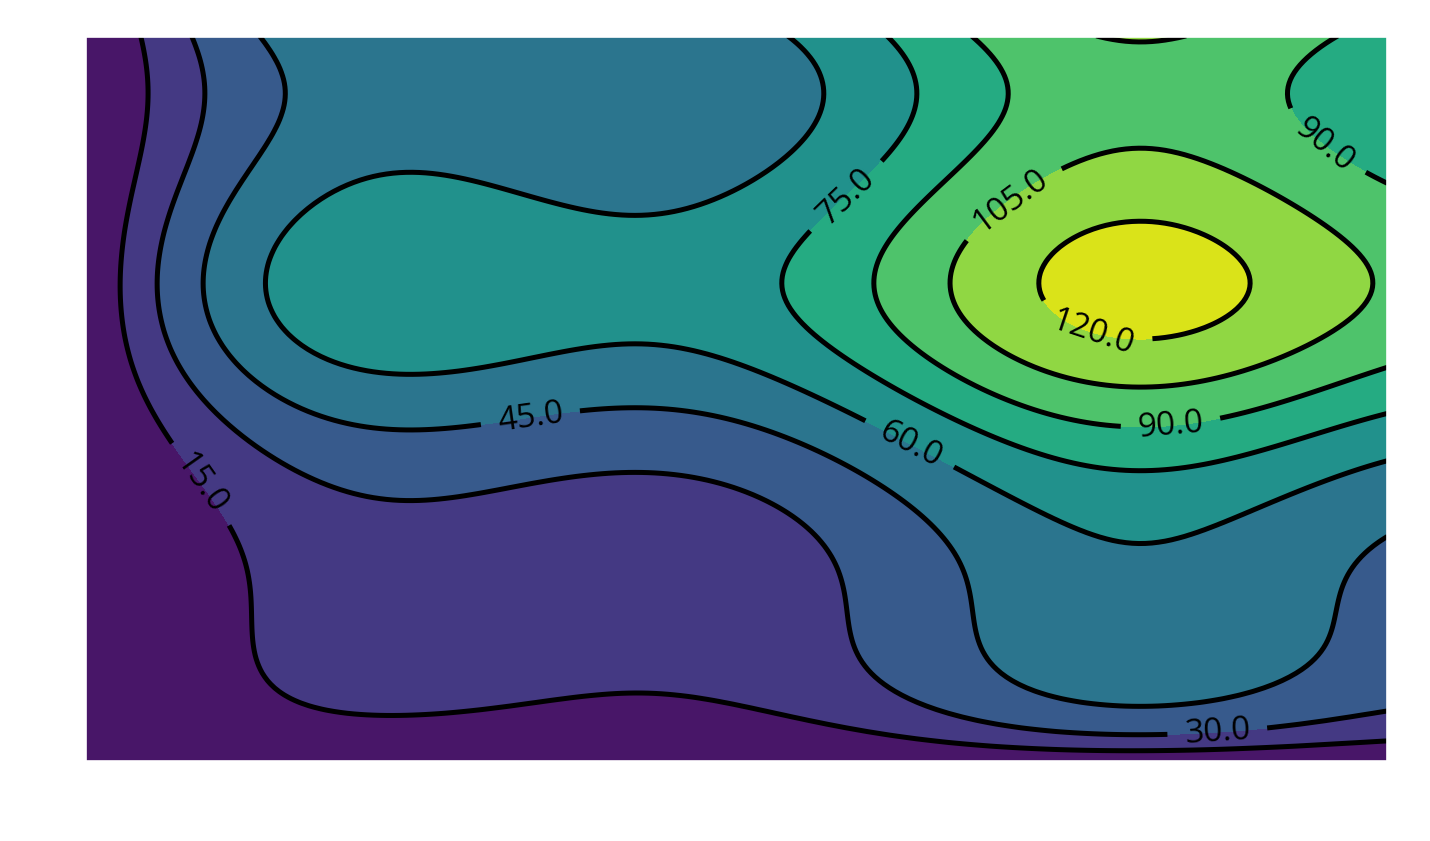

In [23]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

## KDE

To look at KDE, let me quickly draw some samples from the above surface

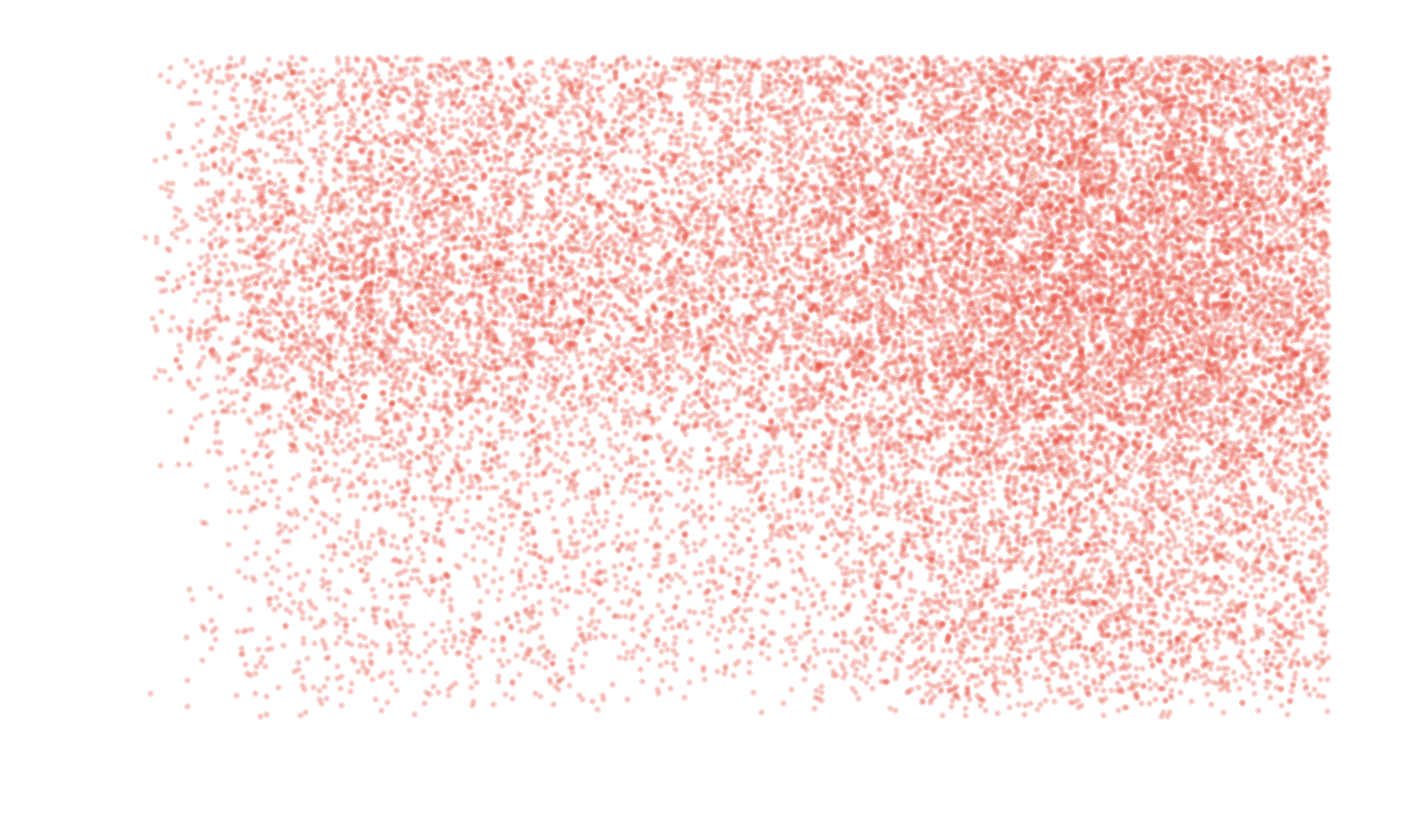

In [24]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

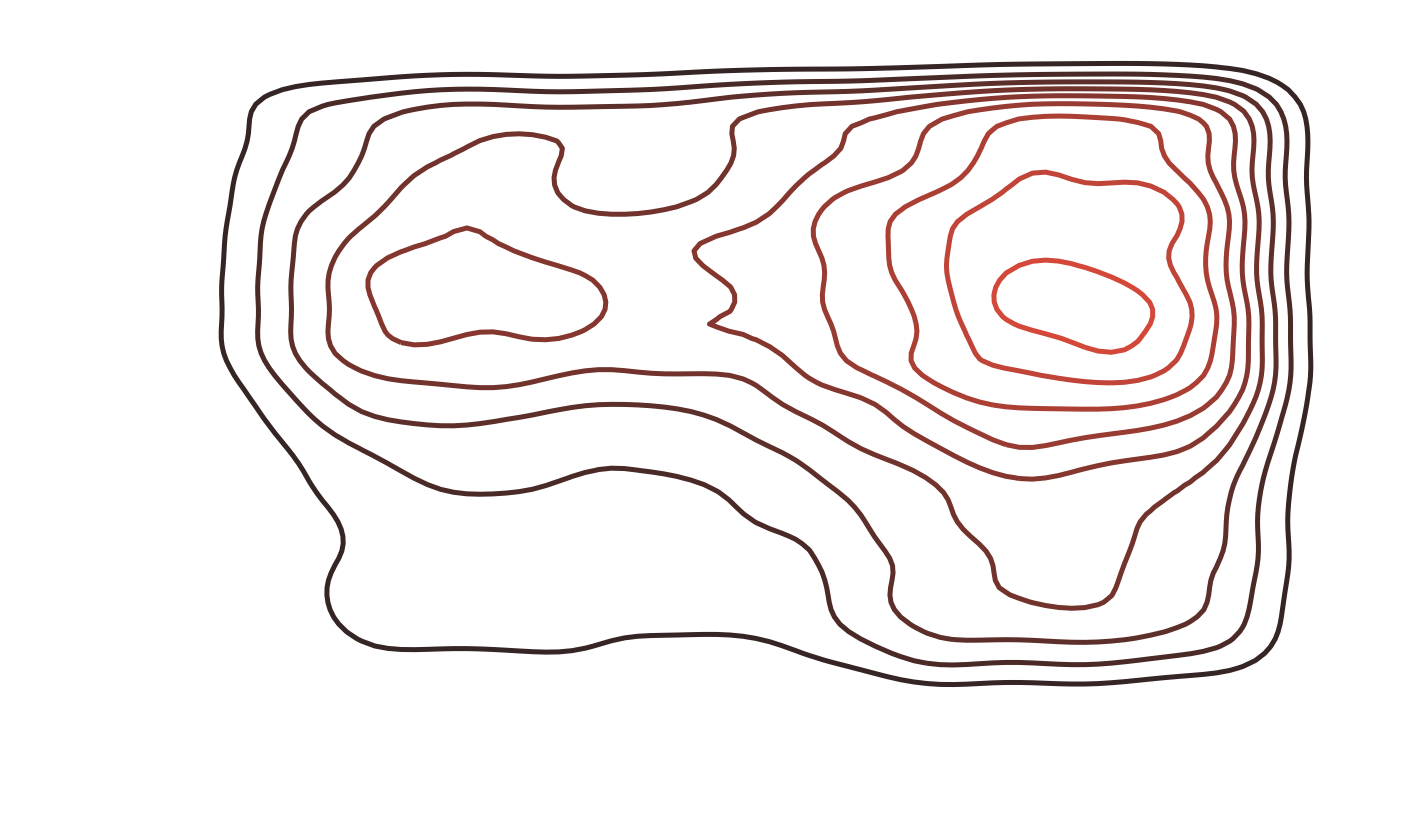

In [25]:
sb.kdeplot(xs, ys);

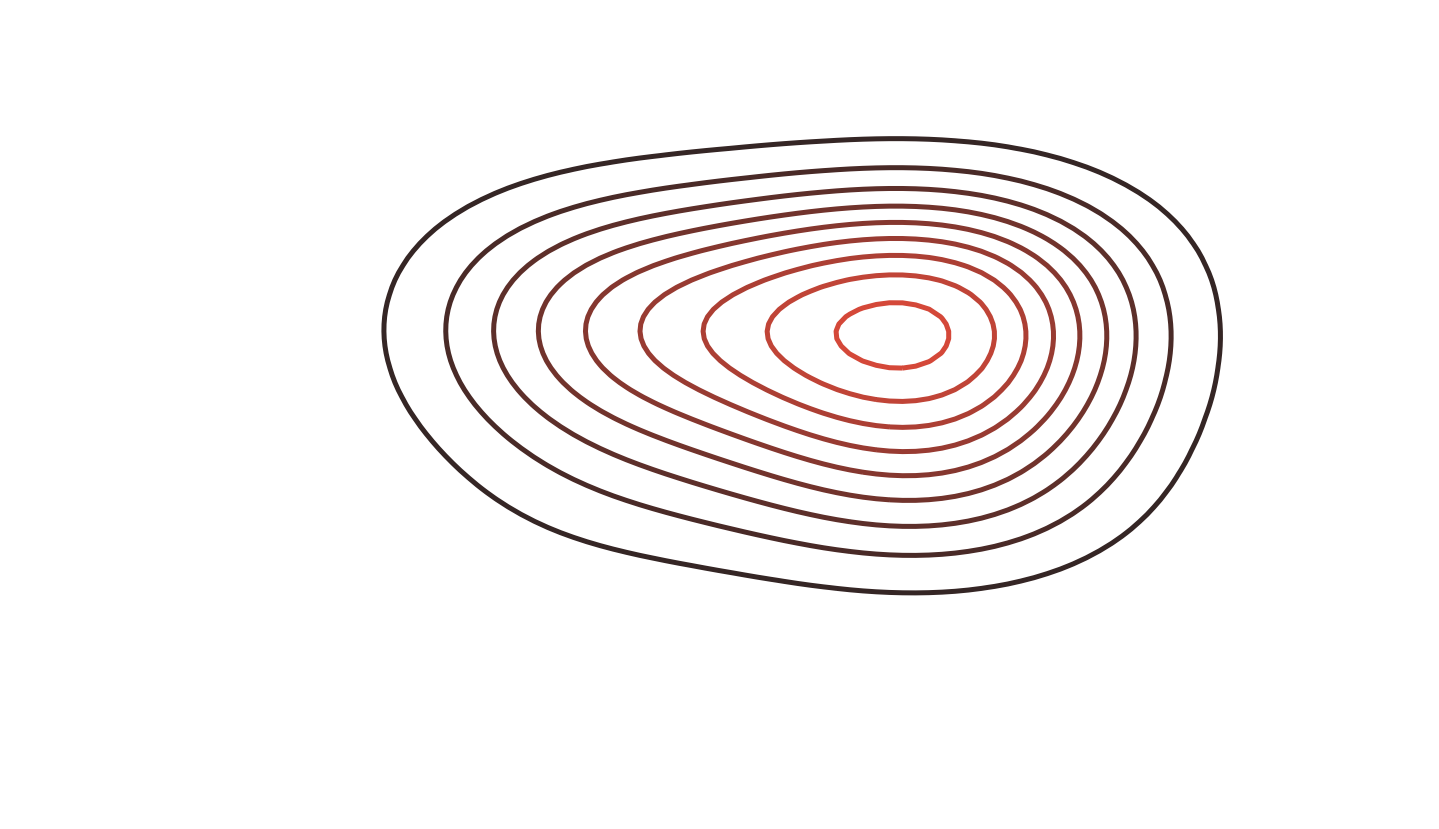

In [26]:
sb.kdeplot(xs, ys, bw=2.0);

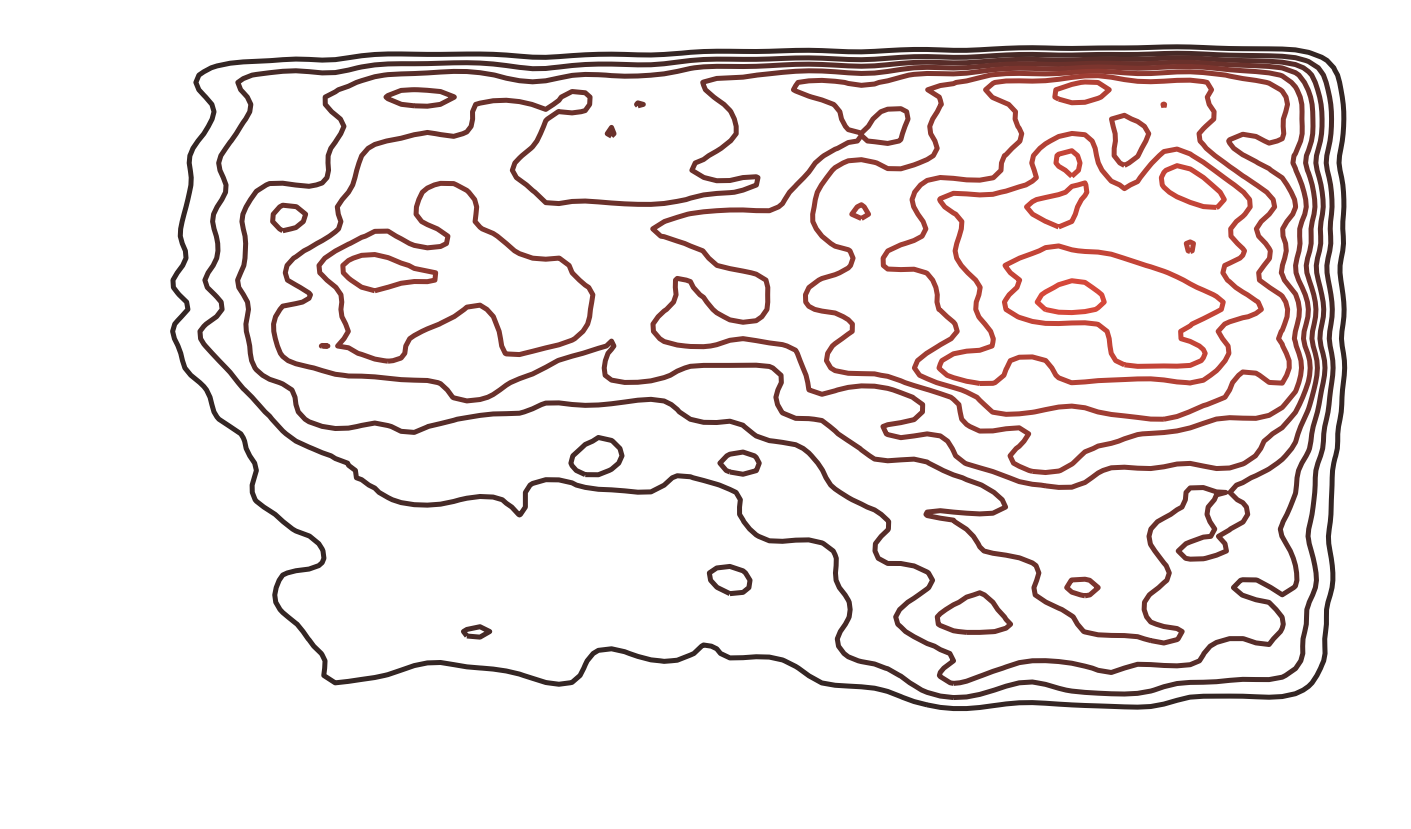

In [27]:
sb.kdeplot(xs, ys, bw=0.2);

## Jointplots

Joint plots allow you to swap out the interior and marginal plots to get something the perfectly suits your needs.

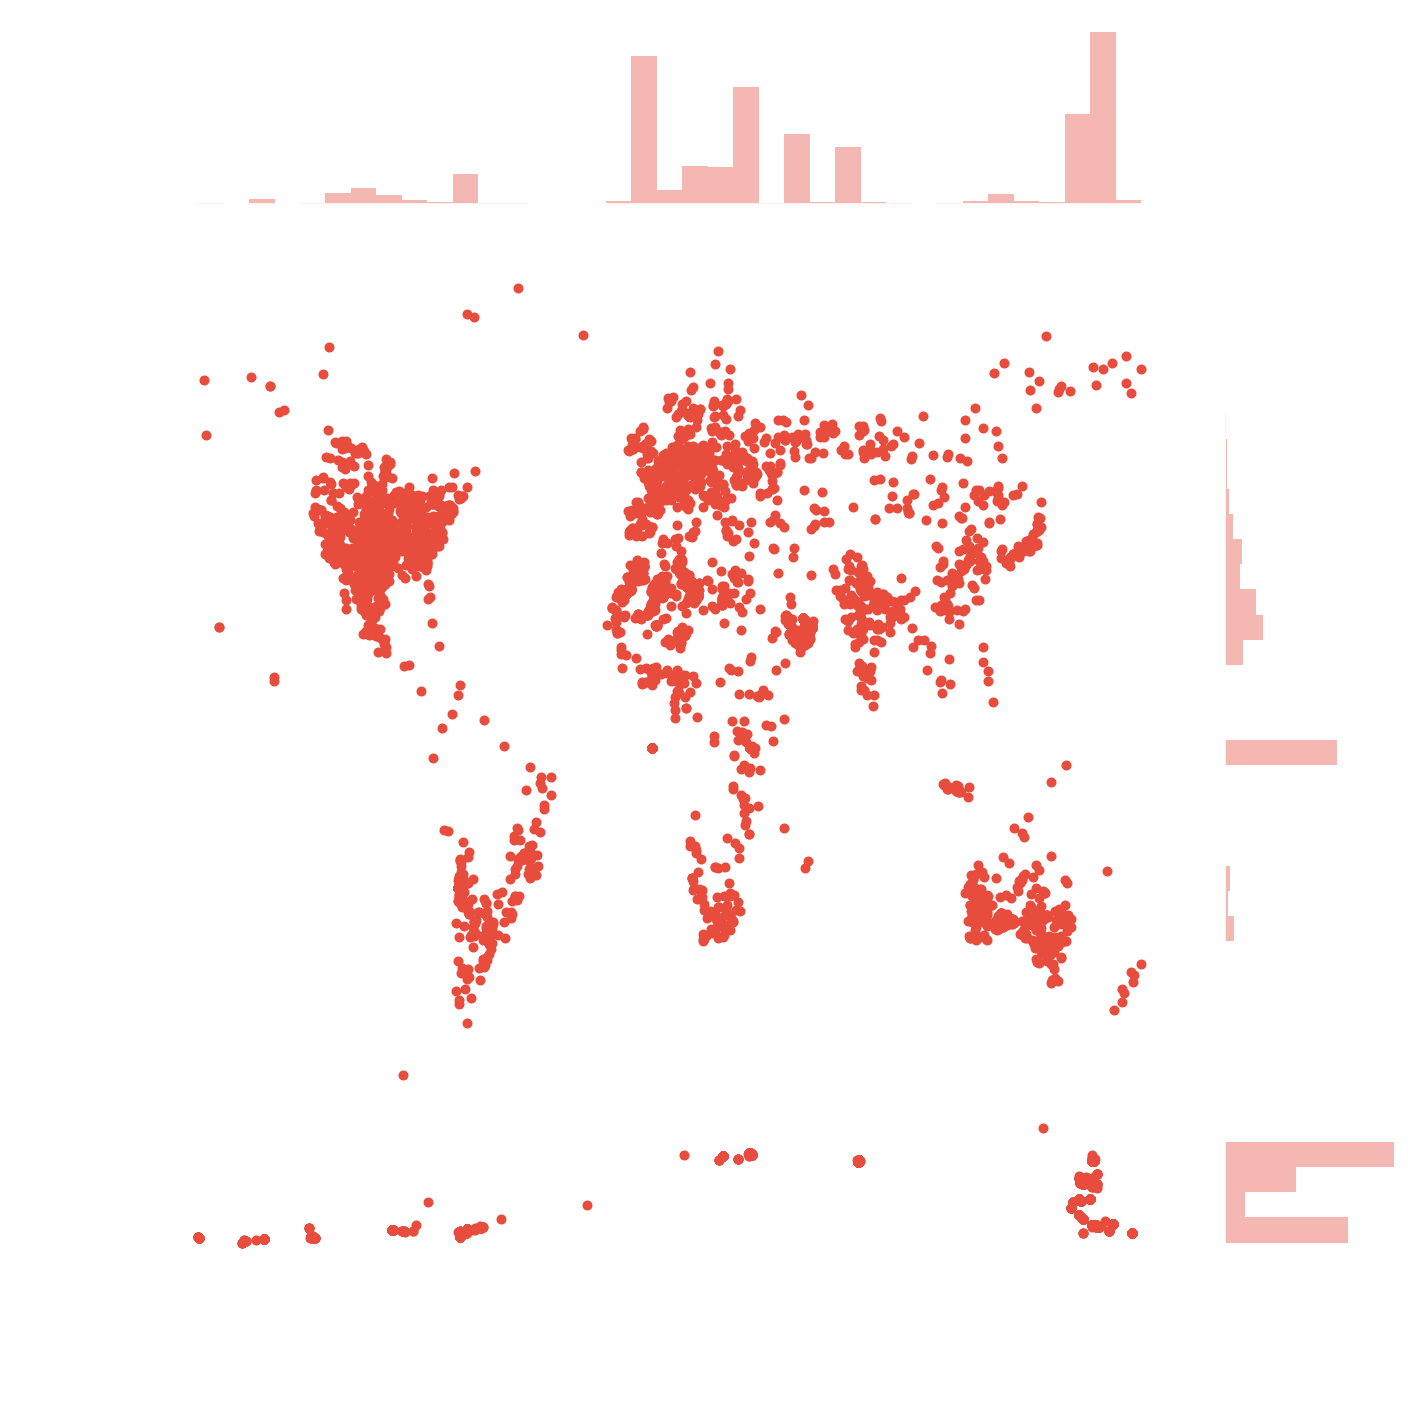

In [28]:
sb.jointplot(data=df, x="reclong", y="reclat");

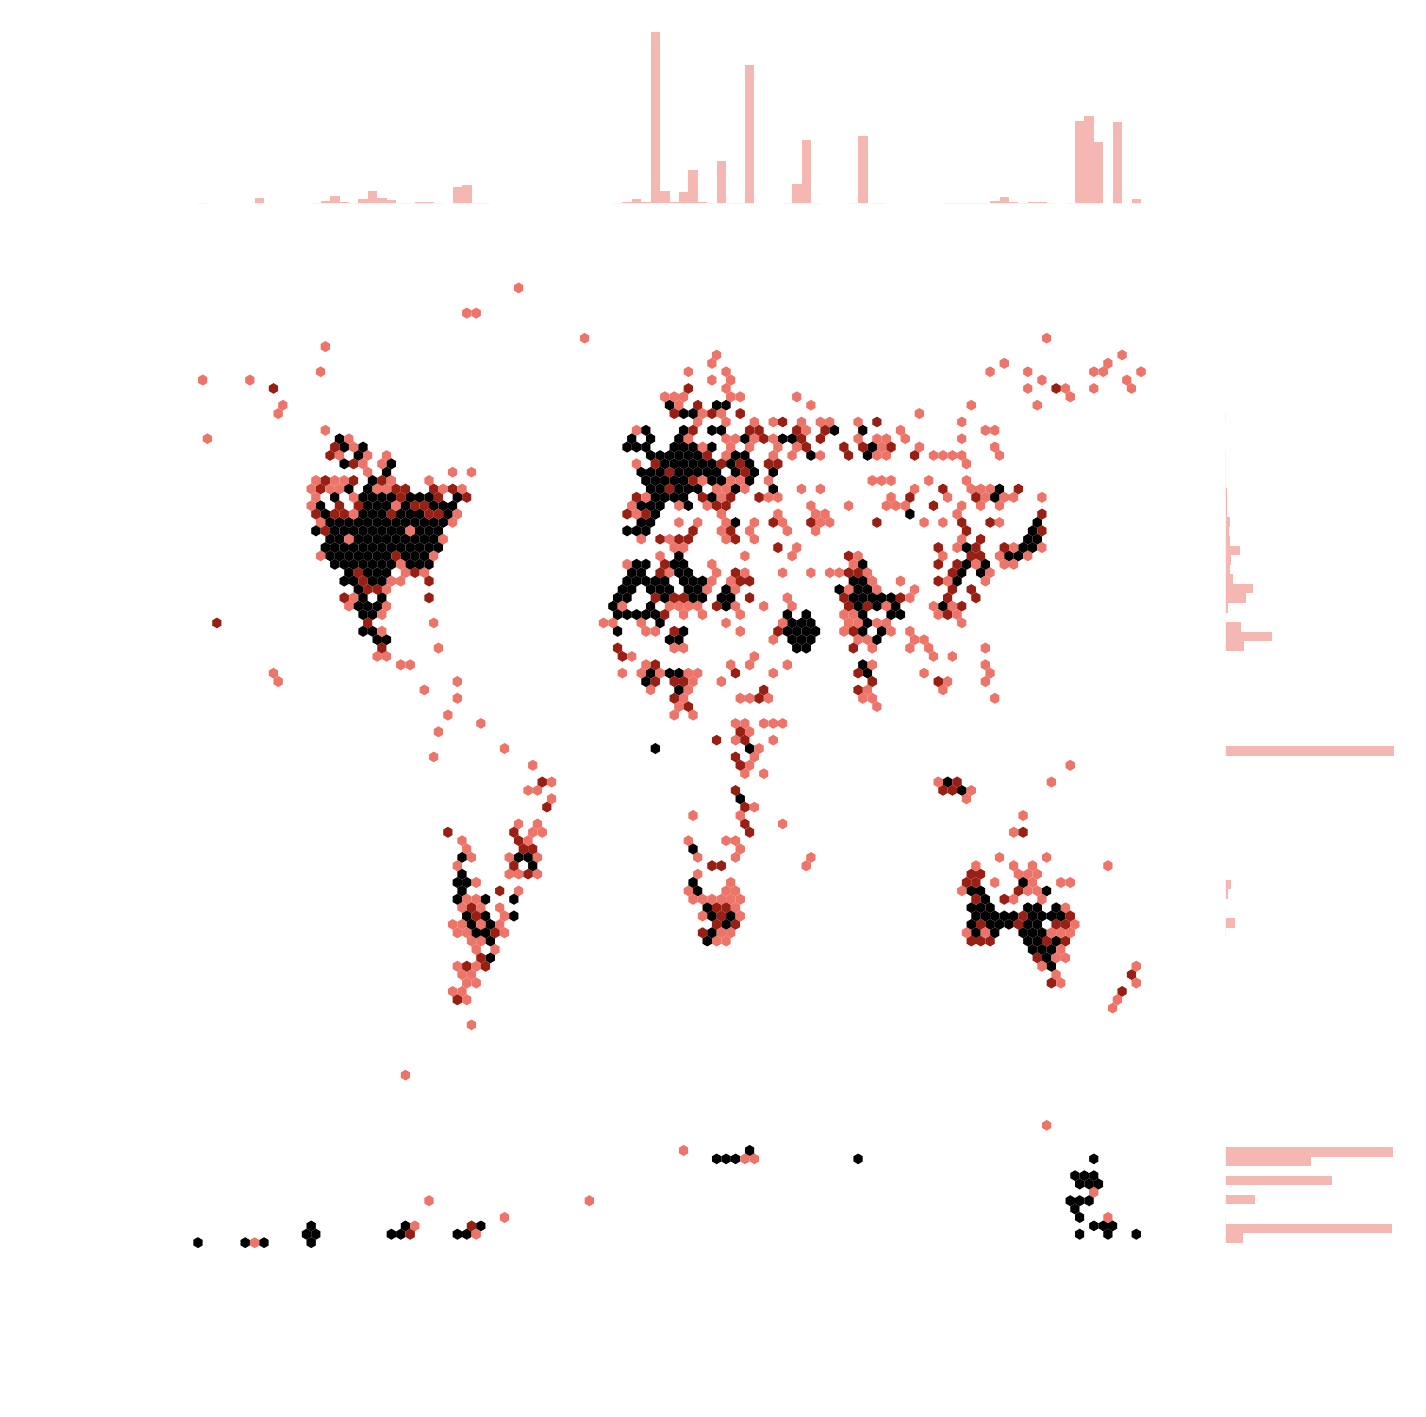

In [29]:
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

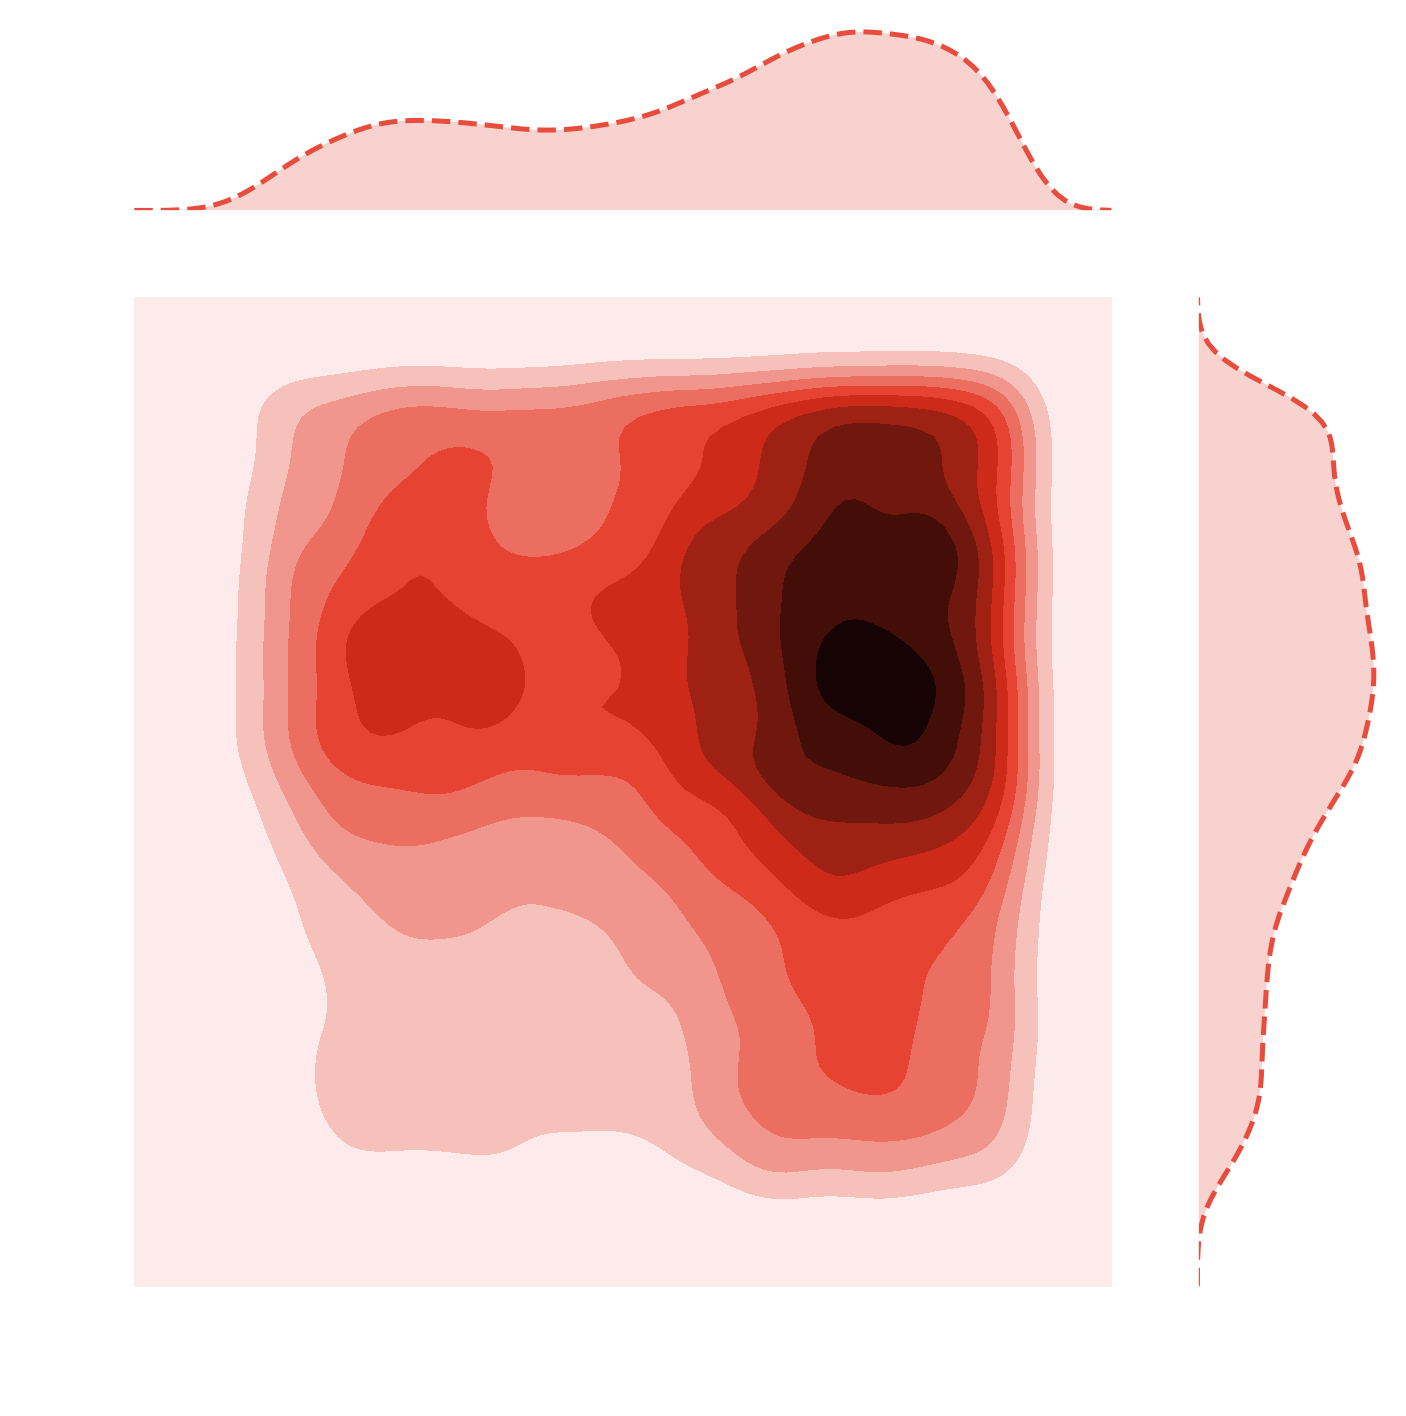

In [30]:
sb.jointplot(x=xs, y=ys, kind="kde");

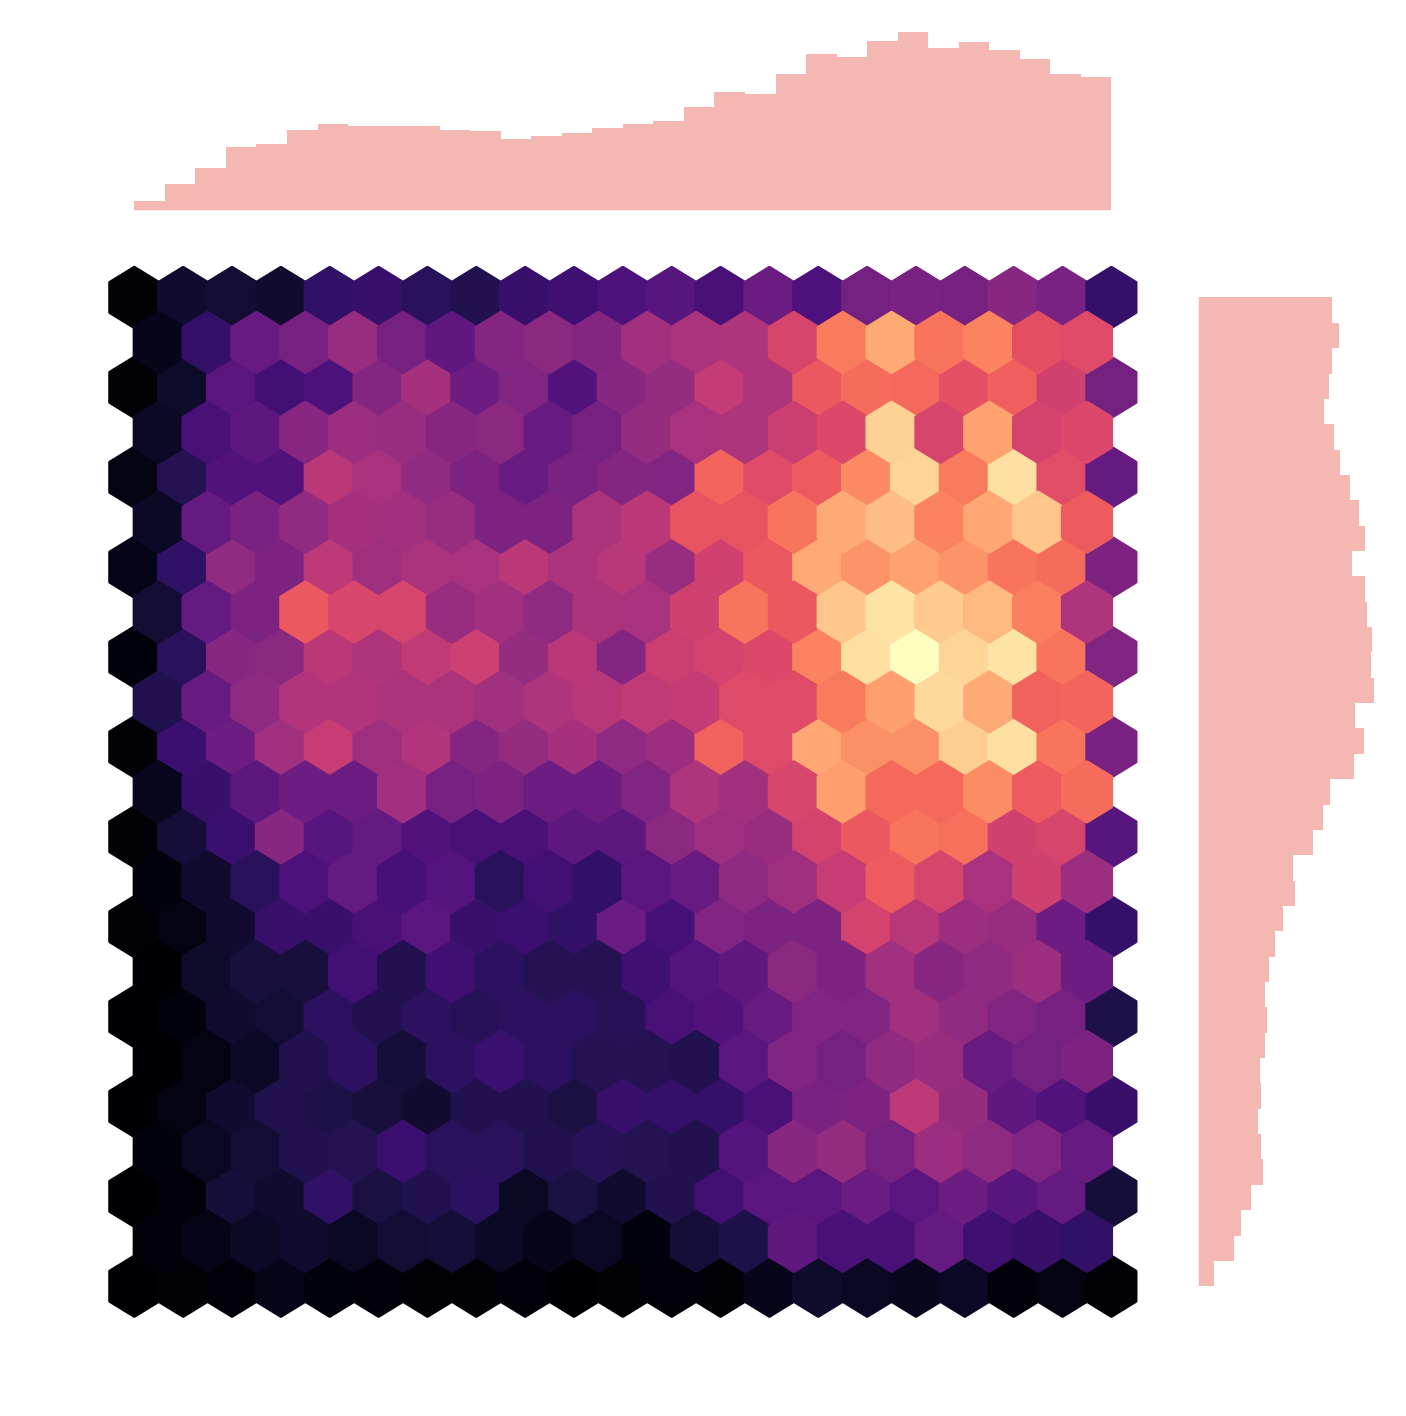

In [31]:
sb.jointplot(x=xs, y=ys, kind="hex", gridsize=20, cmap="magma");

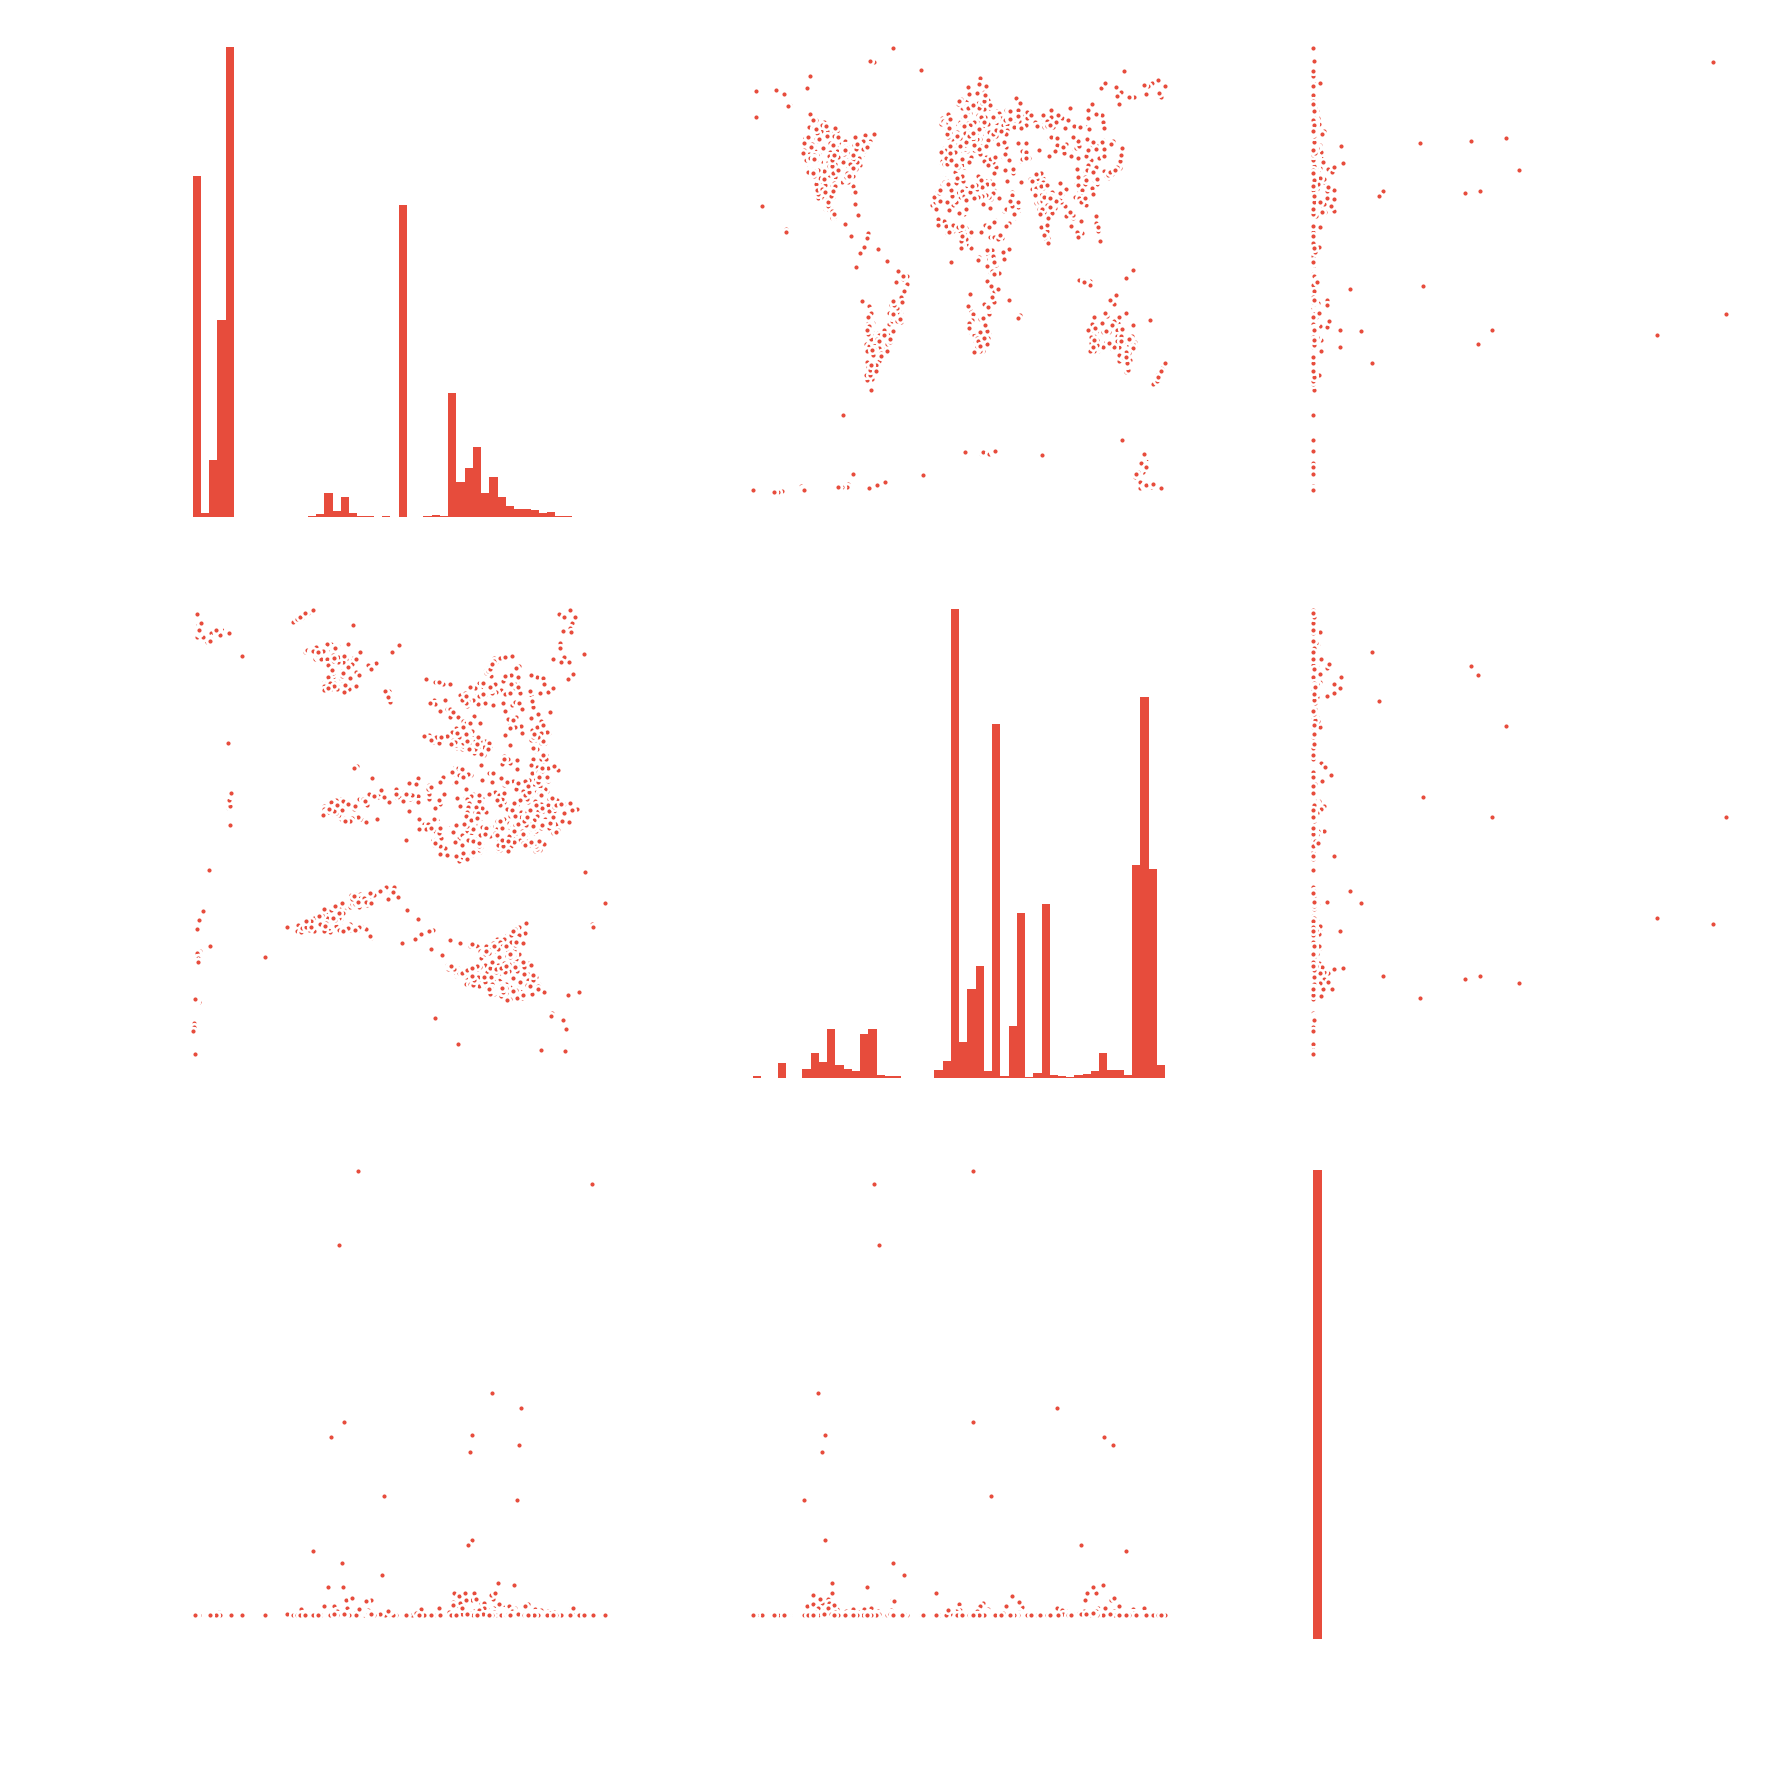

In [34]:
sb.pairplot(data=df[["reclat", "reclong", "mass"]]);

### Recap

* plt.hist2d
* plt.hexbin
* df.plot.hexbin
* plt.contour
* plt.contourf
* sb.kdeplot
* sb.jointplot